# logistic regression

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df = pd.read_csv('Heart Failure.csv')
     

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [5]:
df['DEATH_EVENT'].value_counts()

DEATH_EVENT
0    203
1     96
Name: count, dtype: int64

# Model training

In [6]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(df.drop('DEATH_EVENT',axis=1), df[['DEATH_EVENT']], random_state=42, train_size=.70)
     

In [7]:

xtrain.count()

age                         209
anaemia                     209
creatinine_phosphokinase    209
diabetes                    209
ejection_fraction           209
high_blood_pressure         209
platelets                   209
serum_creatinine            209
serum_sodium                209
sex                         209
smoking                     209
time                        209
dtype: int64

In [8]:
xtest.shape

(90, 12)

In [9]:
ytrain.count()

DEATH_EVENT    209
dtype: int64

In [10]:
ytest.shape

(90, 1)

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
reg = LogisticRegression()

In [13]:
reg.fit(xtrain,ytrain)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [14]:
reg.coef_ # number of features = number of coefficient

array([[ 6.20990582e-02, -4.39898507e-04,  1.15026779e-04,
         1.04163301e-04, -6.33189321e-02, -7.13464306e-04,
        -1.42385413e-06,  8.10202112e-03,  1.16685464e-03,
        -9.36198059e-04, -7.00099954e-06, -2.11994968e-02]])

# Accurracy:

In [15]:
reg.score(xtrain,ytrain['DEATH_EVENT'])

0.8516746411483254

In [16]:
reg.score(xtest,ytest['DEATH_EVENT'])

0.8

In [17]:
test_value_prediction = reg.predict(xtest)
test_value_prediction

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0], dtype=int64)

In [18]:
cd = df.iloc[1:2]
cd


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1


In [19]:
lol = reg.predict(cd.drop('DEATH_EVENT',axis=1))
lol
     

array([1], dtype=int64)

In [20]:
ytest['predicted_value'] = test_value_prediction

In [21]:
ytest.head(5)

,DEATH_EVENT,predicted_value
281,0,0
265,0,0
164,1,0
9,1,1
77,0,0


# Confusion matrix

In [22]:
reg.score(xtest , ytest['predicted_value'])

1.0

In [23]:

reg.score(xtest,ytest['DEATH_EVENT'])

0.8

In [24]:
reg.score(xtest,reg.predict(xtest))

1.0

In [25]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,RocCurveDisplay
     

In [26]:
accuracy_score(ytest['DEATH_EVENT'],reg.predict(xtest))

0.8

In [27]:
accuracy_score(ytest['predicted_value'],reg.predict(xtest))

1.0

In [28]:
np.set_printoptions(suppress=True)
reg.predict_proba(xtest)

array([[0.96482449, 0.03517551],
       [0.98913012, 0.01086988],
       [0.86577371, 0.13422629],
       [0.09701311, 0.90298689],
       [0.83844216, 0.16155784],
       [0.98295919, 0.01704081],
       [0.42717492, 0.57282508],
       [0.90791294, 0.09208706],
       [0.05893415, 0.94106585],
       [0.79330876, 0.20669124],
       [0.80894087, 0.19105913],
       [0.87766725, 0.12233275],
       [0.8470879 , 0.1529121 ],
       [0.7017336 , 0.2982664 ],
       [0.50616616, 0.49383384],
       [0.39196858, 0.60803142],
       [0.90137051, 0.09862949],
       [0.62745461, 0.37254539],
       [0.73489563, 0.26510437],
       [0.46676018, 0.53323982],
       [0.61647593, 0.38352407],
       [0.81765737, 0.18234263],
       [0.90912216, 0.09087784],
       [0.32985268, 0.67014732],
       [0.31631113, 0.68368887],
       [0.99436823, 0.00563177],
       [0.96401392, 0.03598608],
       [0.9069799 , 0.0930201 ],
       [0.96003305, 0.03996695],
       [0.95683226, 0.04316774],
       [0.

In [29]:
cm=confusion_matrix(ytest['DEATH_EVENT'], test_value_prediction)
cm

array([[50,  3],
       [15, 22]], dtype=int64)

<Axes: >

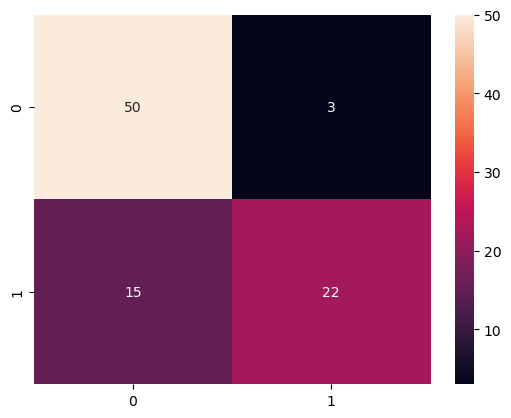

In [30]:
sns.heatmap(cm, annot=True)

In [31]:
precision_score(ytest['DEATH_EVENT'], reg.predict(xtest))

0.88

In [32]:
recall_score(ytest['DEATH_EVENT'], reg.predict(xtest))

0.5945945945945946

In [33]:
f1_score(ytest['DEATH_EVENT'], reg.predict(xtest))

0.7096774193548386

In [34]:
print(classification_report(ytest['DEATH_EVENT'], reg.predict(xtest)))

              precision    recall  f1-score   support

           0       0.77      0.94      0.85        53
           1       0.88      0.59      0.71        37

    accuracy                           0.80        90
   macro avg       0.82      0.77      0.78        90
weighted avg       0.81      0.80      0.79        90



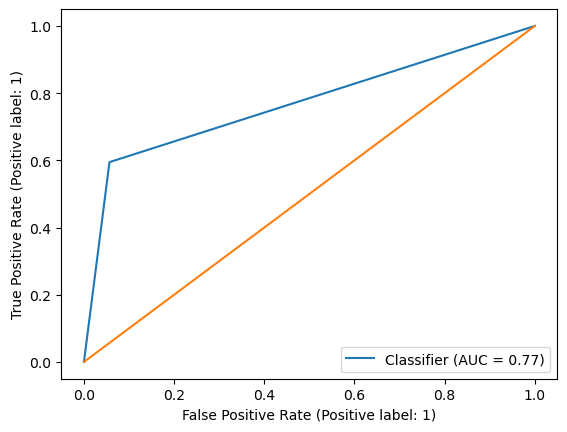

In [35]:
RocCurveDisplay.from_predictions(ytest['DEATH_EVENT'], reg.predict(xtest))
plt.plot([0,1],[0,1])
plt.show()
